In this notebook, we are looking for the diagnosis of heart disease among patients using the [heart disease dataset](https://www.kaggle.com/johnsmith88/heart-disease-dataset). First, read the information about the different features, then answer the questions in each section using the attached data.

# Data

## Importing Libraries

In this notebook, you cannot use scikit learn and other libraries, except for those imported below.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

Load dataset csv file into a data frame.

In [77]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
%cp /content/gdrive/MyDrive/ML/HW1/heart.csv /content/
df = pd.read_csv('heart.csv')
df.head(5)

Mounted at /content/gdrive/


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,-1
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,-1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,-1
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,-1
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,-1


## EDA

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. In this section, you should analyze the data. You can use the functions provided by the Pandas library. You can use analysis such as null checking of features, number of features and samples, and type of features. But don't stop there and search for it.


In [78]:
# Next code segments are also a part of EDA
print("Shape of the df: ", df.shape)
print("\nData types of every features:\n", df.dtypes)
print("\nCheck for null:\n", df.isnull().sum())
print("\nSummary of features:\n", df.describe())

Shape of the df:  (1025, 14)

Data types of every features:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Check for null:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Summary of features:
                age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.00000


Distribution of sex:
1    713
0    312
Name: sex, dtype: int64


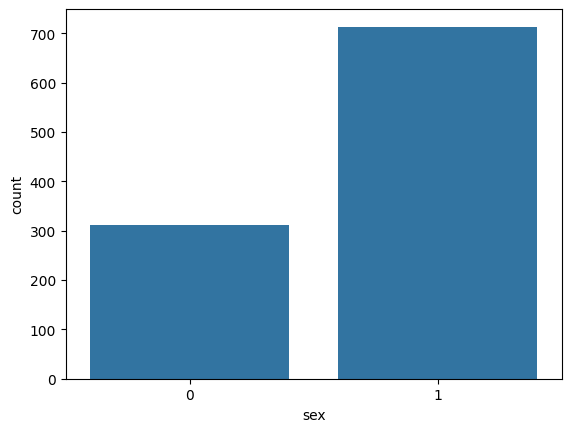


Distribution of cp:
0    497
2    284
1    167
3     77
Name: cp, dtype: int64


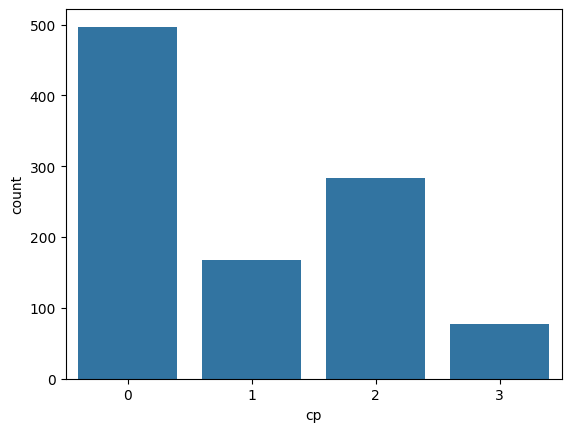


Distribution of fbs:
0    872
1    153
Name: fbs, dtype: int64


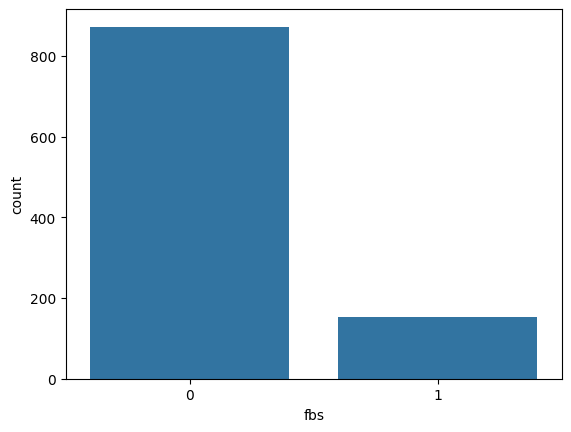


Distribution of restecg:
1    513
0    497
2     15
Name: restecg, dtype: int64


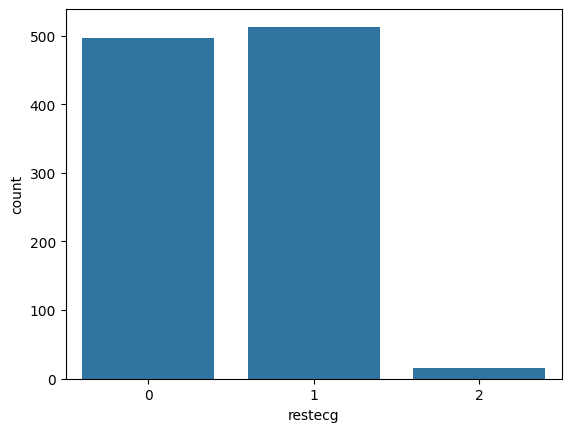


Distribution of exang:
0    680
1    345
Name: exang, dtype: int64


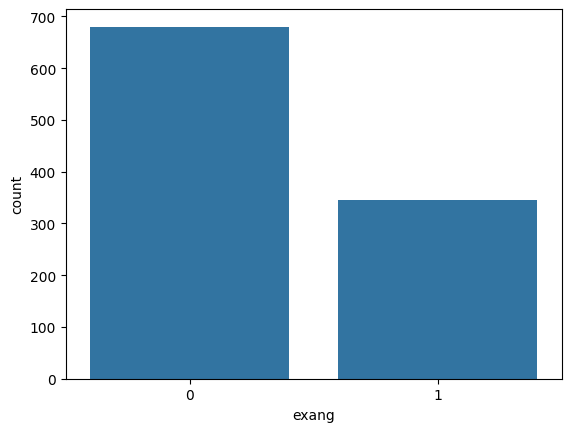


Distribution of slope:
1    482
2    469
0     74
Name: slope, dtype: int64


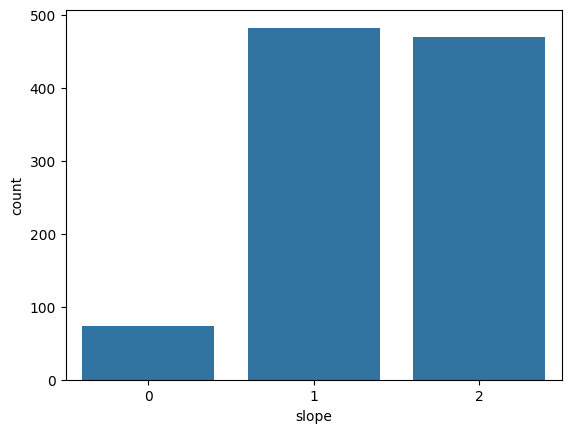


Distribution of ca:
0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64


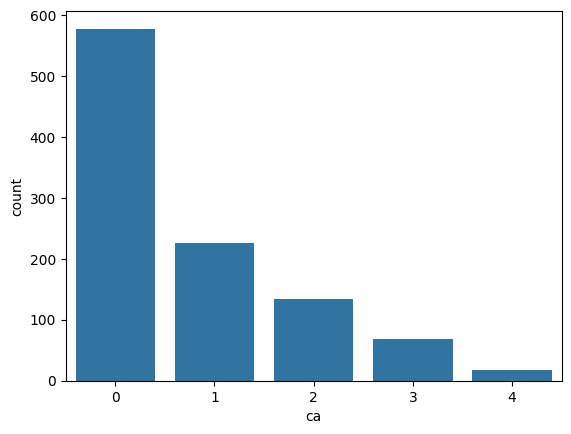


Distribution of thal:
2    544
3    410
1     64
0      7
Name: thal, dtype: int64


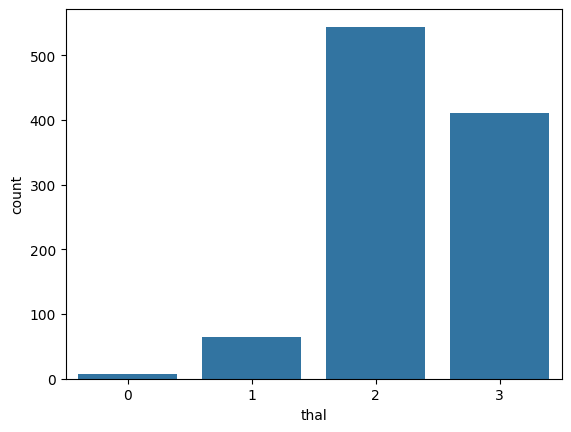


Distribution of target:
 1    526
-1    499
Name: target, dtype: int64


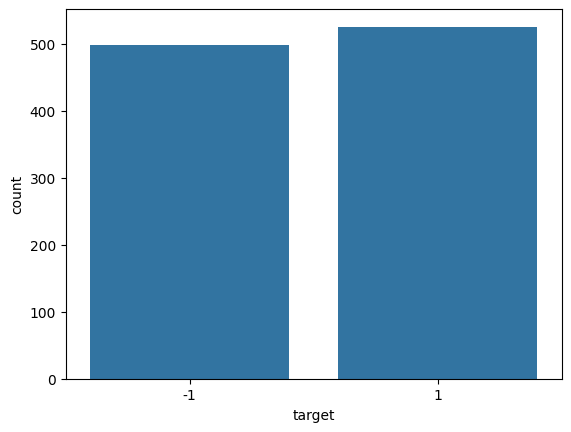

In [79]:
discrete_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
for feature in discrete_features:
    print(f"\nDistribution of {feature}:")
    print(df[feature].value_counts())
    sns.countplot(x=feature, data=df)
    plt.show()

# Interpretation:
# Sex: dataset has more males than females
# Chest Pain Type (cp): majority of people are of type 0 , with the fewest people of type 3
# restecg: The distribution is balanced between types 0 and 1, with very few type 2.
# Thalassemia (thal): most common values: 2 > 3 > 1 > 0.
# Target: the target is almost balanced.

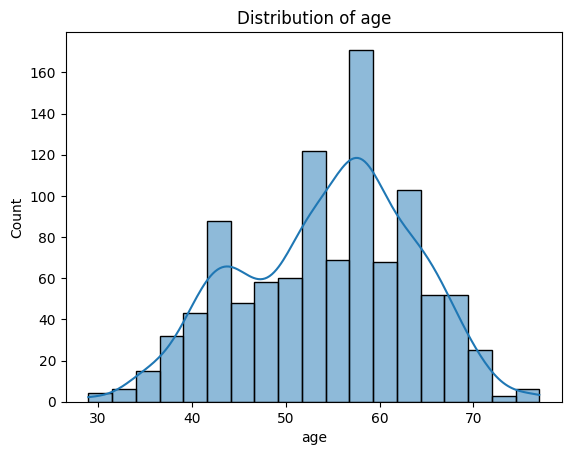

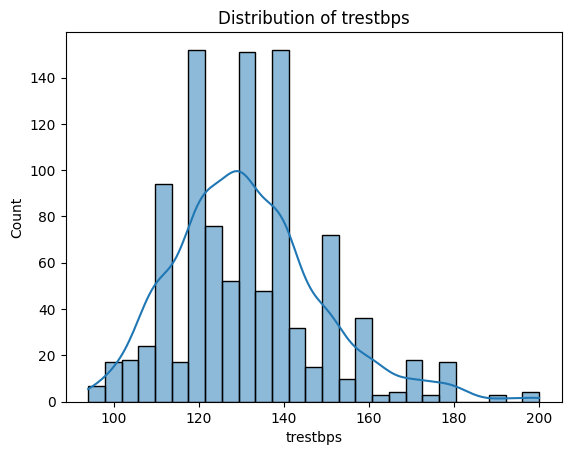

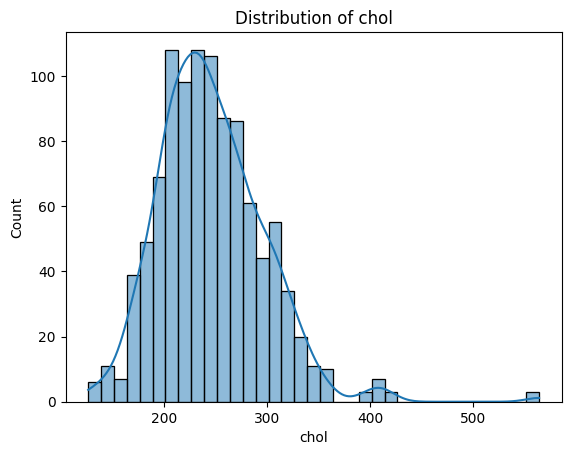

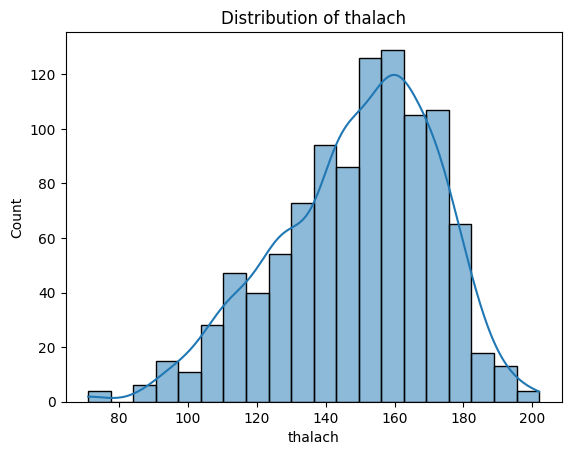

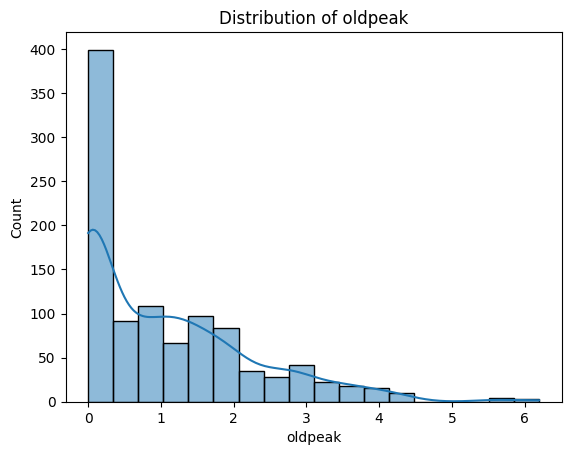

In [80]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for feature in continuous_features:
    sns.histplot(df[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

# Interpretation:
# Oldpeak: This variable shows a right-skewed distribution with most values 0.
# thalach: The distribution is normally distributed with a left skew
# Age: The age distribution is also normally distributed with an average around 55-60 years old.
# chol: The distribution of chol is normally distributed with a small right skew.

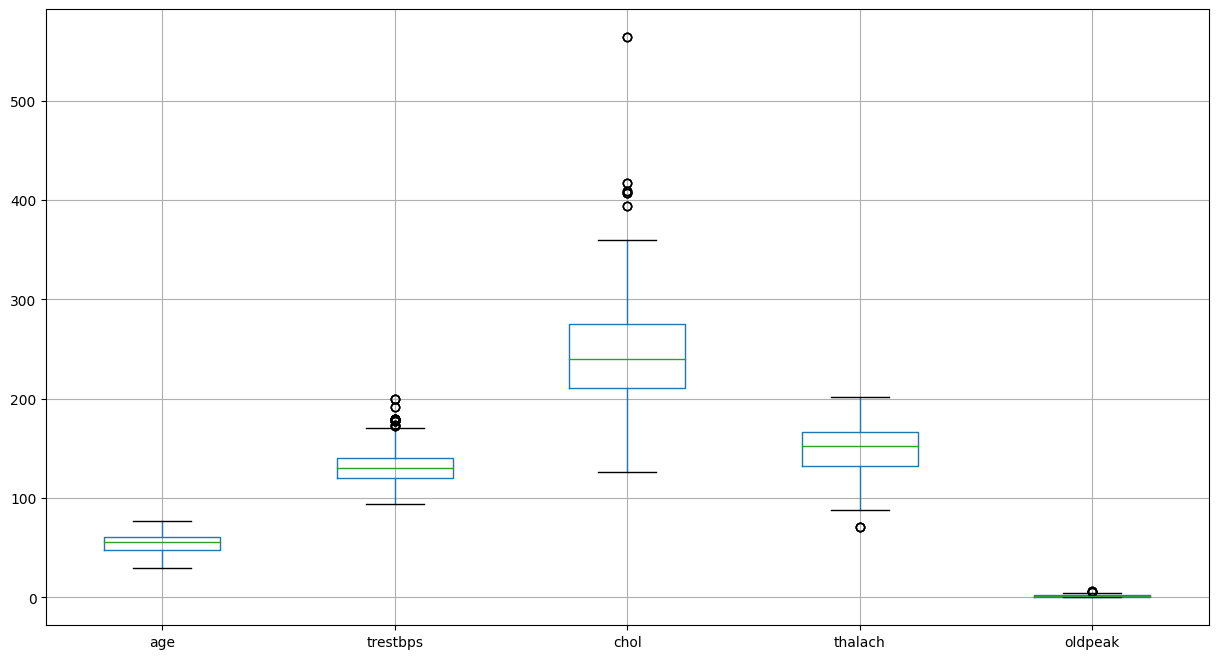

In [81]:
plt.figure(figsize=(15, 8))
df[continuous_features].boxplot()
plt.show()

# Interpretation:
# trestbps and chol show some outliers. These can be actual differences or errors in data. We should decide to remove them or transform them.

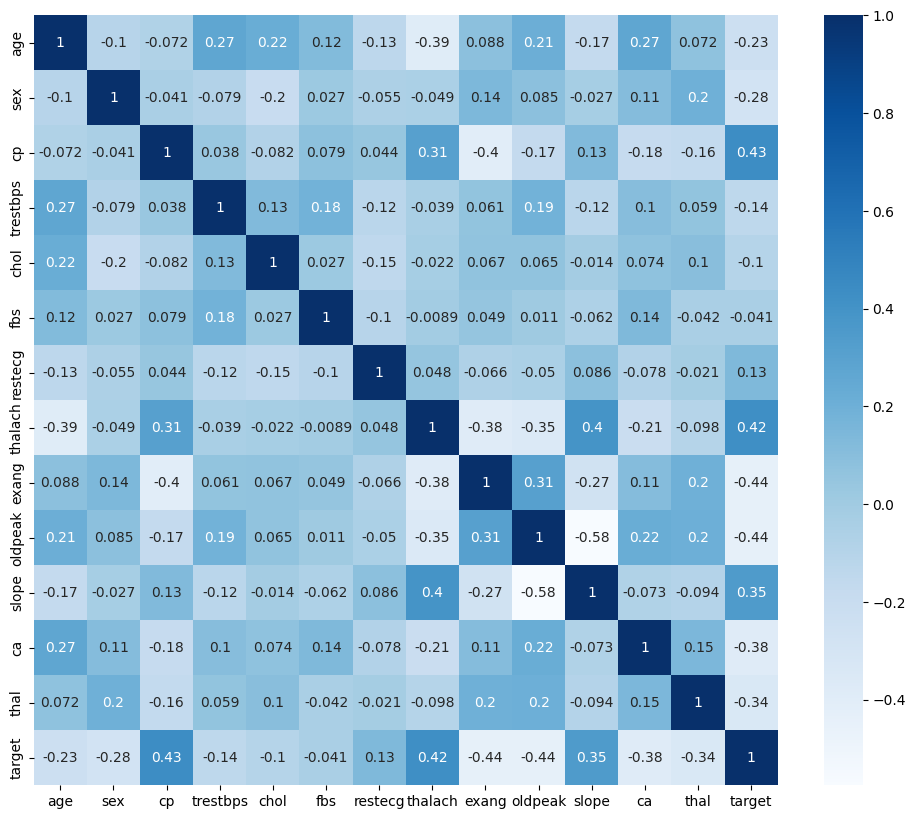

In [82]:
#Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

# Interpretation:
# The heatmap shows the correlation of different features in a dataset. cp and target have a positive
# correlation of 0.43. Also thalach and target have a positive correlation of 0.42, this shows that higher
# maximum heart rates is an imporatn facor for heart disease. exang and target have a negative
# correlation of -0.44, so that patients with exercise-induced angina are less probable to have heart
# disease. oldpeak and target have a negative correlation of -0.44. This shows the imapct of oldpeak
# on the disease. sex, trestbps, chol, fbs, and restecg show weak correlations with target

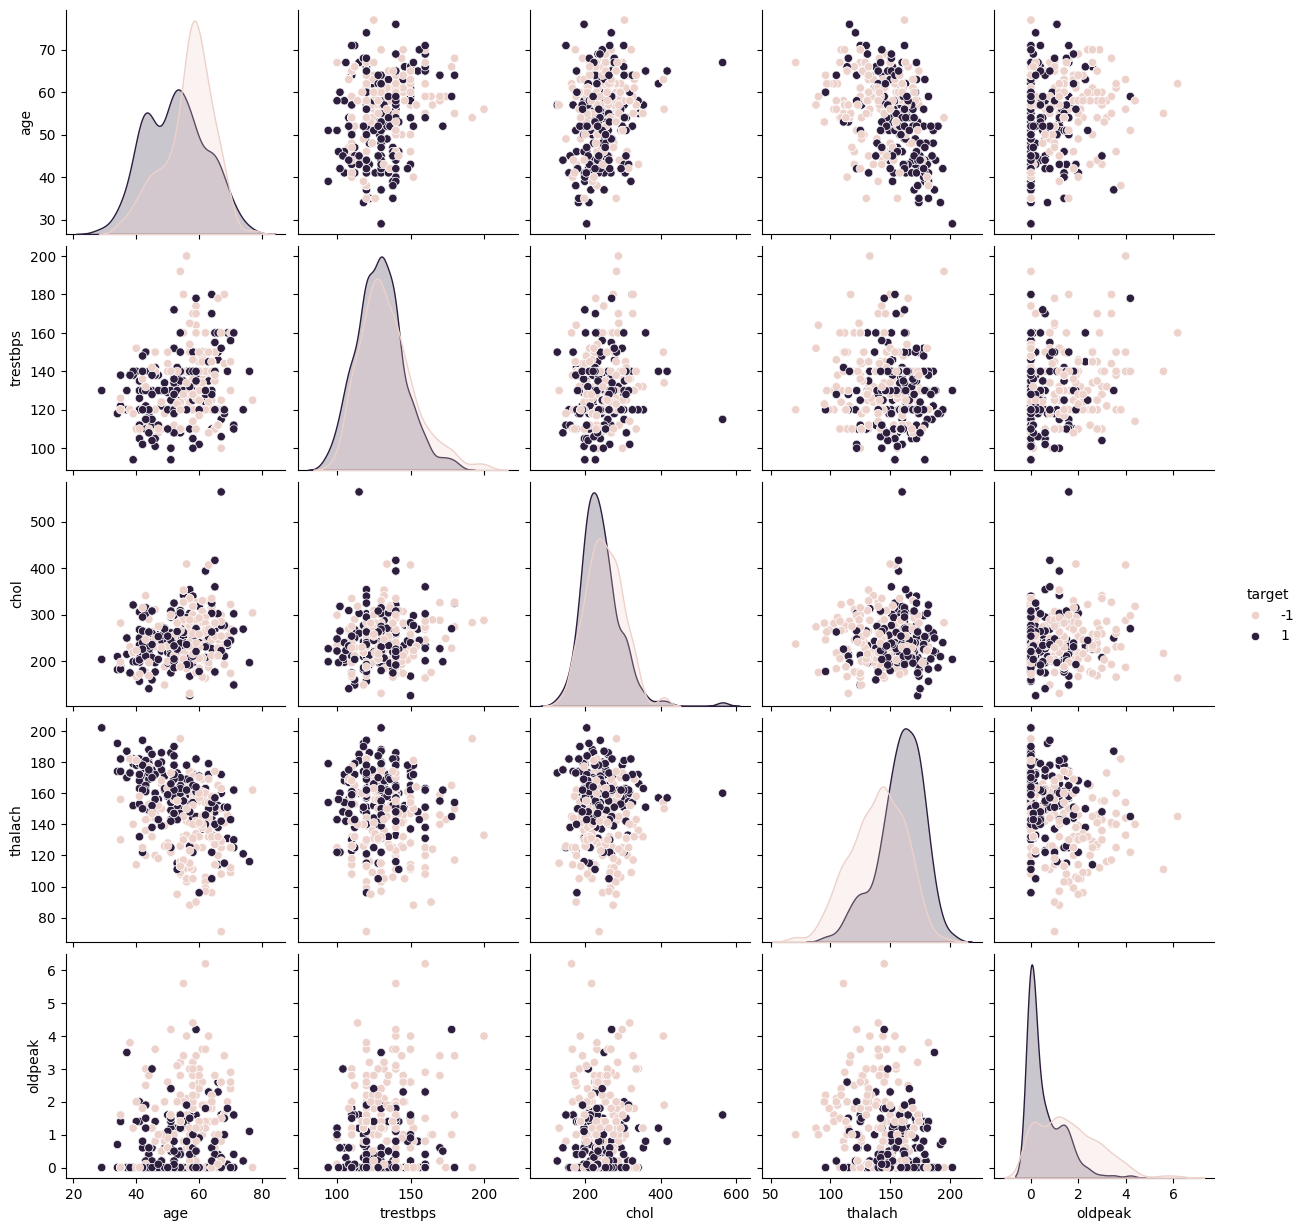

In [83]:
sns.pairplot(df[continuous_features + ['target']], hue='target')
plt.show()

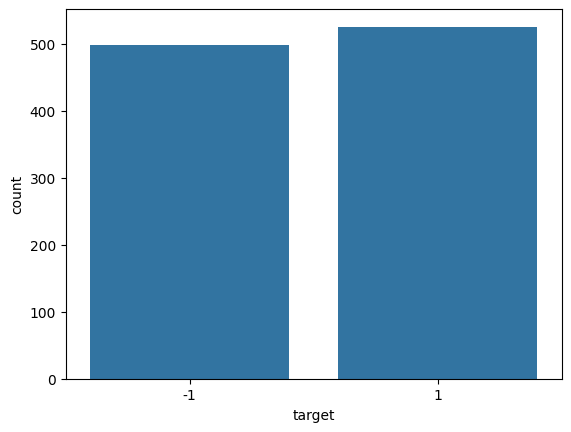

In [84]:
#Distribution of Target Variable
sns.countplot(x='target', data=df)
plt.show()

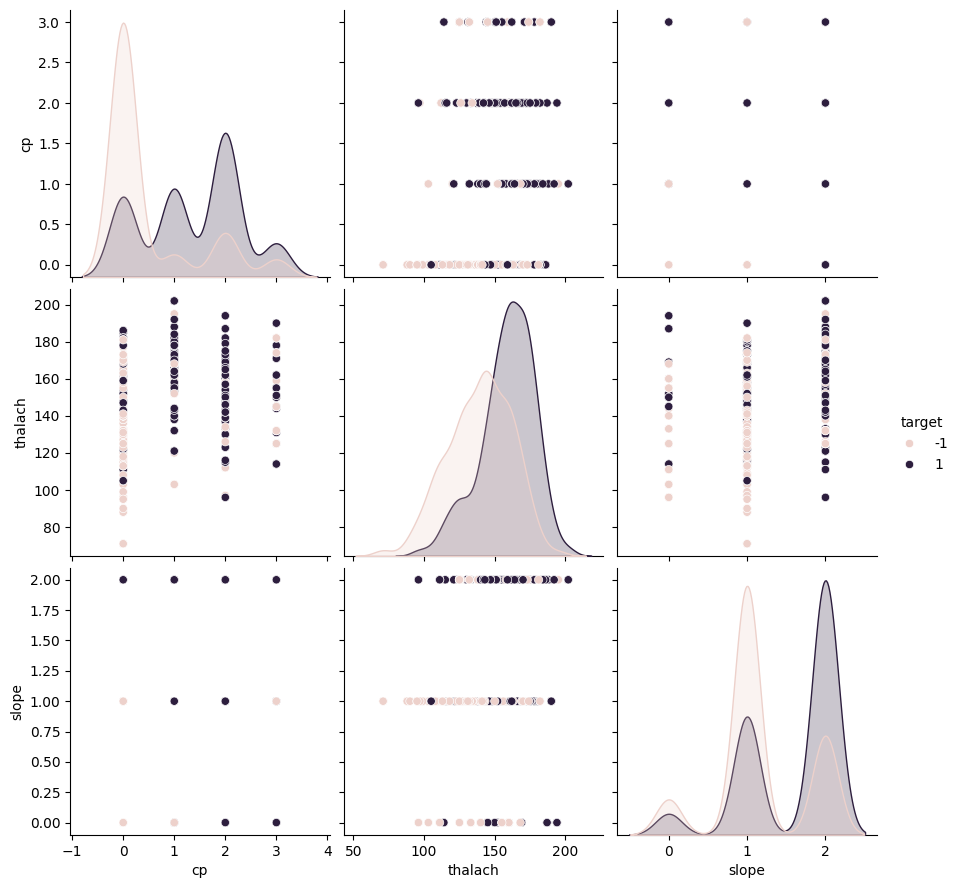

In [85]:
sns.pairplot(df, vars=['cp', 'thalach', 'slope'], hue='target', height=3)
plt.show()

# Interpretation:
# cp and thalach: There is a pattern with cp types 1,2 and 3 hve higher maximum hear rates. This is epsecially obvious for people with hear disease.
# cp and slope: This one has a smaller pattern, but still can indicate that people with heart disease are more experiencing a non typical anginaof cp and slope type 1 and 2.
# thalach and slope: It can be seen that higher heart rates and slope of 2 are more likely to have heart disease.
# cp: The plot showsthat type - is the most common cp for people without heart disease.
# thalach: The plot shows people with heart disease have higher rates.
# slope: The category 2 seems more common with people with heart disease.

## Analysis of Features

As you have probably noticed, in the dataset that you checked, some features are discrete and the rest are continuous. The following code specifiescontinuous and discrete features for you. **Note**: In the cells below, `df` is the same dataframe that you loaded in the previous section. You can change its name according to your code.

In [86]:
feature_list = [feature for feature in df.columns]
print("There are",len(feature_list),"features found in the data")

There are 14 features found in the data


In [87]:
#Print Discrete Feature Data
discrete_feature=[feature for feature in feature_list if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))
print("Discrete features are ",discrete_feature)

#Print Continuous Feature Data
cont_feature=[feature for feature in feature_list if len(df[feature].unique())>25]
print("Continuous Variables Count: {}".format(len(cont_feature)))
print("Continuous features are ",cont_feature)

Discrete Variables Count: 9
Discrete features are  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continuous Variables Count: 5
Continuous features are  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Perceptron

### Stochastic Gradient Descent

We will implement the perceptron algorithm in python 3 and numpy. The perceptron will learn using the stochastic gradient descent algorithm (SGD). Gradient Descent minimizes a function by following the gradients of the cost function.

### Calculating the Error

To calculate the error of a prediction we first need to define the objective function of the perceptron.

#### Hinge Loss Function

To do this, we need to define the loss function, to calculate the prediction error. We will use hinge loss for our perceptron:

$$c(x, y, f(x)) = (1 - y * f(x))_+$$

$c$ is the loss function, $x$ the sample, $y$ is the true label, $f(x)$ the predicted label.

This means the following:
$$
c(x, y, f(x))=
\begin{cases}
    0,& \text{if } y * f(x)\geq 1\\
    1-y*f(x),              & \text{else}
\end{cases}
$$

So consider, if y and f(x) are signed values $(+1,-1)$:

<ul>
    <li>the loss is 0, if $y*f(x)$ are positive, respective both values have the same sign.</li>
    <li>loss is $1-y*f(x)$ if $y*f(x)$ is negative</li>
</ul>

#### Objective Function

As we defined the loss function, we can now define the objective function for the perceptron:

$$l_i(w) = \big(-y_i \langle x_i,w \rangle\big)_+$$

We can write this without the dot product with a sum sign:

$$l_i(w) = (-y_i \sum_{i=1}^n x_iw)_+$$

So the sample $x_i$ is misclassified, if $y_i \langle x_i,w \rangle \leq 0$. The general goal is, to find the global minima of this function, respectively find a parameter $w$, where the error is zero.

#### Derive the Objective Function

To do this we need the gradients of the objective function. The gradient of a function $f$ is the vector of its partial derivatives. The gradient can be calculated by the partially derivative of the objective function.

$$ \nabla l_i(w) = -y_i x_i $$


This means, if we have a misclassified sample $x_i$, respectively $ y_i \langle x_i,w \rangle \leq 0 $, update the weight vector
$w$ by moving it in the direction of the misclassified sample.


$$w = w + y_i x_i$$

With this update rule in mind, we can start writing our perceptron algorithm in python.

## Model


Finally we can code our SGD algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

In [88]:
def perceptron_sgd(X, Y):
    w = np.zeros(X.shape[1])
    learning_rate = 0.01
    epochs = 1000
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (Y[i] * np.dot(x, w)) <= 0:
                w = w + learning_rate * Y[i] * x
                total_error += 1
        errors.append(total_error)
    return w, errors

### Let the Perceptron learn!

Next we can execute our code to train a classifier model. To see the learning progress of the perceptron, we add a plotting feature to our algorithm, counting the total error in each epoch.

In [89]:
def perceptron_sgd_plot(X, Y):
    w = np.zeros(X.shape[1])
    lr = 0.01
    epochs = 1000
    errors = []

    for epoch in range(epochs):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w)*Y[i]) <= 0:
                w = w + lr*X[i]*Y[i]
                total_error += 1
        errors.append(total_error)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.show()

    return w

In [90]:
X = df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'age', 'trestbps', 'chol', 'thalach', 'oldpeak']].to_numpy()
y = df.loc[:, "target"].to_numpy()

In [91]:
# TODO: Add a bias term -1 into the dataset. This is needed for the SGD to work.
X = df.drop('target', axis=1).values
y = df['target'].values
# add a -1 bias term to the end of each row
bias_column = np.ones((X.shape[0], 1)) * -1

# Concatenate the original X with the bias column
X = np.concatenate((X, bias_column), axis=1)

In [92]:
def train_test_split(X, y, test_size=0.2):
    np.random.seed(39)
    shuffled_indices = np.random.permutation(len(X))
    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_val, y_train, y_val = train_test_split(X, y, 0.2)

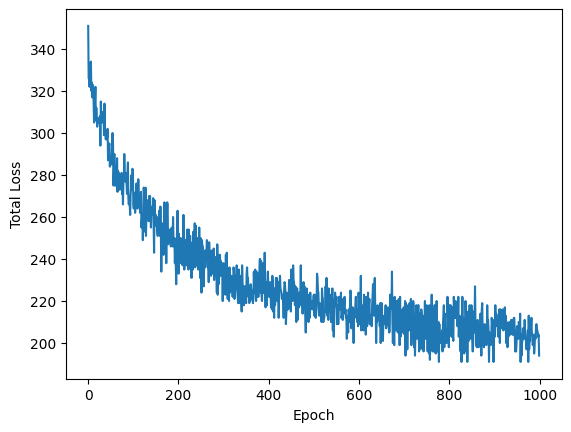

In [93]:
w = perceptron_sgd_plot(X_train,y_train)

### Accuracy

In [94]:
def accuracy_score(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    return correct / len(y_true)

Get the accuracy of your model

1.   List item
2.   List item

using the function you implemented.

In [95]:
predictions = np.dot(X_val, w)
predictions = np.where(predictions >= 0, 1, -1)
print('In validation dataset:')
print(accuracy_score(y_val, predictions))

In validation dataset:
0.8390243902439024


### Confusion Matrix

Implement the `confusion_matrix` function to generate the confusion matrix by receiving the predicted labels, the real labels and the labels themselves.

In [96]:
def confusion_matrix(actual, predicted, labels):
    matrix = np.zeros((len(labels), len(labels)))
    for i in range(len(labels)):
        for j in range(len(labels)):
            matrix[i, j] = np.sum((actual == labels[i]) & (predicted == labels[j]))
    return matrix

Implement the following function to plot the confusion matrix obtained from the previous part.

In [97]:
def plot_confusion_matrix(matrix, labels, title='Confusion Matrix', cmap=plt.cm.Blues):
    fig, ax = plt.subplots()
    cax = ax.matshow(matrix, cmap=cmap)
    plt.title(title)
    fig.colorbar(cax)

    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, str(int(matrix[i, j])), ha="center", va="center",
                    color="white" if matrix[i, j] > matrix.max() / 2. else "black")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

Now plot the confusion matrix for your model:

[-1  1]


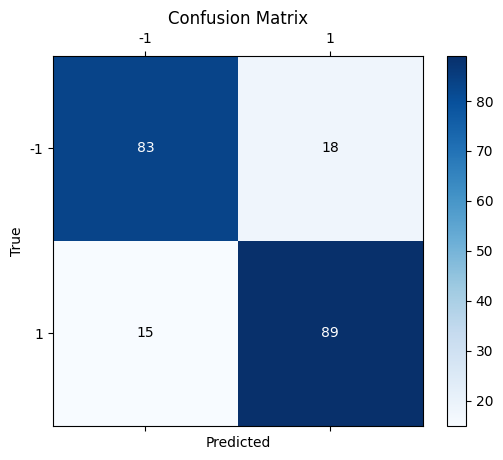

In [98]:
labels = np.unique(y)
print(labels)
cm = confusion_matrix(y_val, predictions, labels)
plot_confusion_matrix(cm, labels)

### F1 Score

Implement the following functions to calculate precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) using confusion matrix. Then calculate all three metrics for your model.

In [99]:
def recall_score(cm):
    TP = cm[1, 1]
    FN = cm[1, 0]
    return TP / (TP + FN)

In [100]:
def precision_score(cm):
    TP = cm[1, 1]
    FP = cm[0, 1]
    return TP / (TP + FP)

In [101]:
def f1_score(cm):
    precision = precision_score(cm)
    recall = recall_score(cm)
    return 2 * (precision * recall) / (precision + recall)

recall = recall_score(cm)
precision = precision_score(cm)
f1 = f1_score(cm)

print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)

Recall:  0.8557692307692307
Precision:  0.8317757009345794
F1 Score:  0.8436018957345972


# Naive Bayes

## Model

To predict the target column we want to use a Naive Bayes classifier. In this section, you must implement the functions of the `MixedDataNB` class. Assume continuous features follow a normal distribution. **Hint**: You need to train a Naive Bayes model that implements the likelihood function for categorical and continuous values in two different ways. Search for Gaussian NB and Multinomial NB. **Note**: Please feel free to modify the following class and its functions.

In [102]:
class MixedDataNB:

    def __init__(self):
        self.class_prior_ = {}
        self.continuous_mean_var_ = {}
        self.discrete_prob_ = {}
        self.feature_types = []

    def fit(self, X, y):
        self.feature_types = []
        for i in range(X.shape[1]):
            unique_values = np.unique(X[:, i])
            if len(unique_values) > 10:
                self.feature_types.append('continuous')
            else:
                self.feature_types.append('discrete')

        self.classes_ = np.unique(y)

        for cls in self.classes_:
            X_cls = X[y == cls]
            self.class_prior_[cls] = len(X_cls) / float(len(X))
            self.continuous_mean_var_[cls] = []
            self.discrete_prob_[cls] = []

            for i, f_type in enumerate(self.feature_types):
                if f_type == 'continuous':
                    self.continuous_mean_var_[cls].append((X_cls[:,i].mean(), X_cls[:,i].var()))
                else:
                    self.discrete_prob_[cls].append(self._calculate_discrete_prob(X_cls[:,i]))

    def _calculate_discrete_prob(self, feature_column):
        values, counts = np.unique(feature_column, return_counts=True)
        total = sum(counts)

        prob = {}
        for val, count in zip(values, counts):
            prob[val] = count / total
        return prob

    def _calculate_prob(self, x, mean, var):
        exponent = np.exp(-((x-mean)**2 / (2 * var)))
        return (1 / (np.sqrt(2 * np.pi * var))) * exponent

    def predict(self, X):
        predictions = []

        for x in X:
            probs = {}
            for cls in self.classes_:
                probs[cls] = np.log(self.class_prior_[cls])
                cont_index = 0
                disc_index = 0

                for i, f_type in enumerate(self.feature_types):
                    if f_type == 'continuous':
                        mean, var = self.continuous_mean_var_[cls][cont_index]
                        cont_index += 1
                        prob = self._calculate_prob(x[i], mean, var)
                        probs[cls] += np.log(prob + 1e-6)

                    else:
                        prob = self.discrete_prob_[cls][disc_index].get(x[i], 1e-6)
                        disc_index += 1
                        probs[cls] += np.log(prob)

            predictions.append(max(probs, key=probs.get))
        return np.array(predictions)

## Train and Validation


### Data splitting

Split the training and validation data. Separate 20% of the data for validation.

1.   List item
2.   List item



In [103]:
X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, 0.2)

### Model training

In [104]:
model = MixedDataNB()
model.fit(X_train, y_train)

### Make predictions

In [105]:
predictions = model.predict(X_val)

### Accuracy

Get the accuracy of your model using the function you implemented.

In [106]:
print(accuracy_score(y_val, predictions))

0.8634146341463415


### Confusion Matrix

Now, using the functions you wrote, plot the confusion matrix for the model you trained.

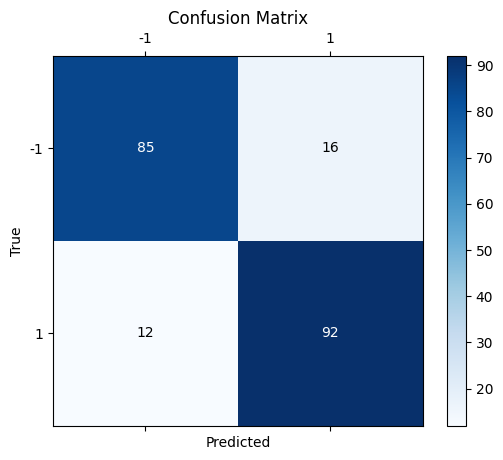

In [107]:
cm = confusion_matrix(y_val, predictions, np.unique(y_val))
plot_confusion_matrix(cm, np.unique(y_val))

### F1 Score

Using your implemented functions in the previous section, calculate precision, recall and F1 score using confusion matrix. Then calculate all three metrics for your model.

In [108]:
print(recall_score(cm))

0.8846153846153846


In [109]:
print(precision_score(cm))

0.8518518518518519


In [110]:
print(f1_score(cm))

0.8679245283018868


### Heatmap

By ploting the heatmap obtained for chol and oldpeak features from your model, compare the usefulness of these two features.


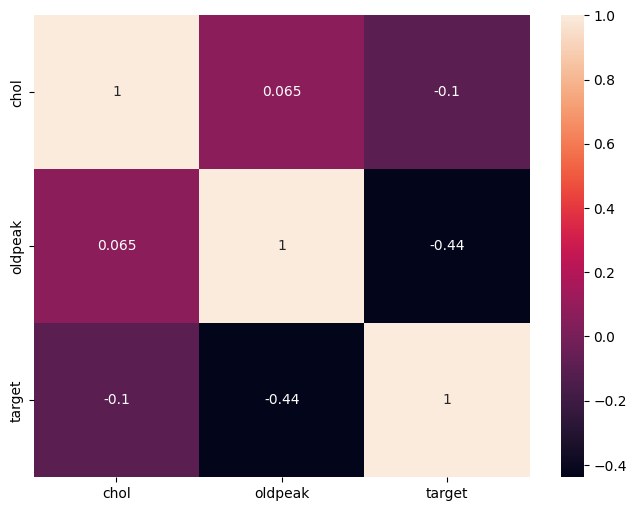

<ipython-input-134-1c3d5a5a60fe>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == cls][feature_name], label=f'Class {cls}')
<ipython-input-134-1c3d5a5a60fe>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == cls][feature_name], label=f'Class {cls}')


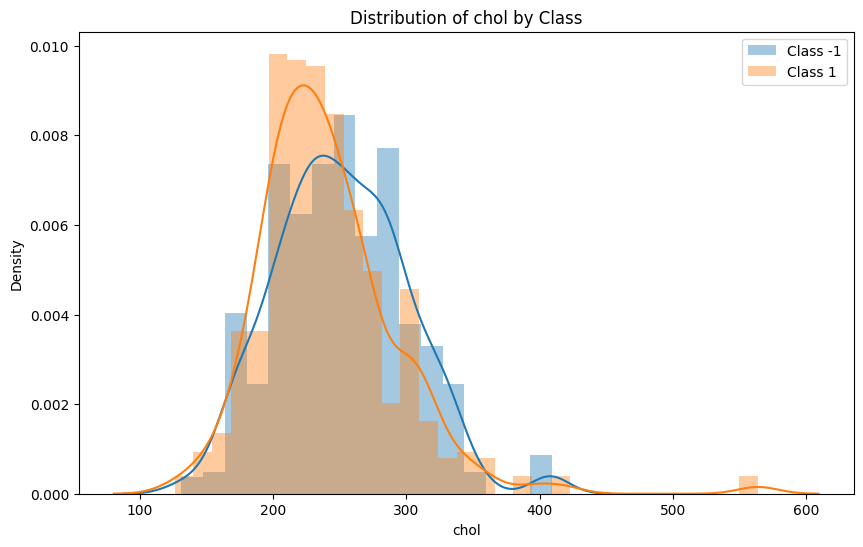

<ipython-input-134-1c3d5a5a60fe>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == cls][feature_name], label=f'Class {cls}')
<ipython-input-134-1c3d5a5a60fe>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['target'] == cls][feature_name], label=f'Class {cls}')


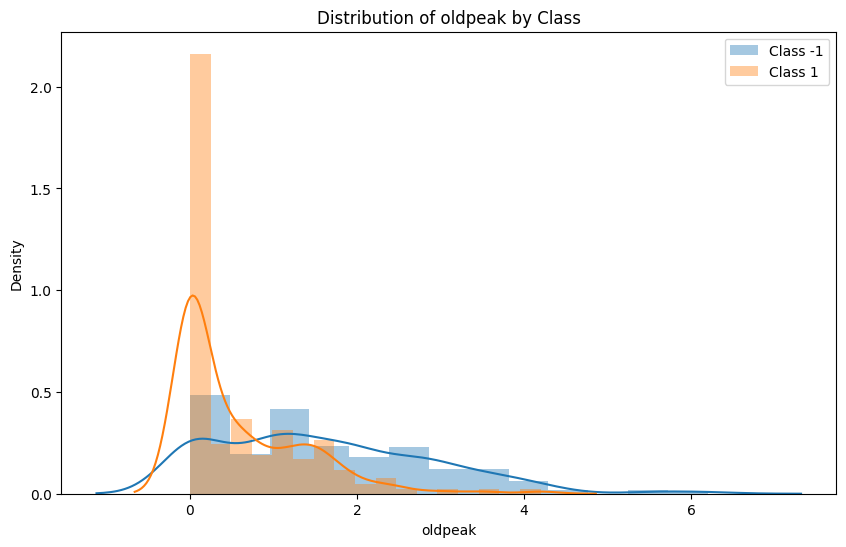

In [134]:
# This part was a little vague, so I did the following

selected_features_df = df[['chol', 'oldpeak', 'target']]
correlation_matrix = selected_features_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()


def plot_feature_distribution_by_class(feature_name):
    plt.figure(figsize=(10, 6))
    for cls in df['target'].unique():
        sns.distplot(df[df['target'] == cls][feature_name], label=f'Class {cls}')
    plt.title(f'Distribution of {feature_name} by Class')
    plt.xlabel(feature_name)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

plot_feature_distribution_by_class('chol')
plot_feature_distribution_by_class('oldpeak')

# for chol, both classes have a almost normal distribution with a peak around a same place.
# But there is higher density of people with heart disease with cholesterol levels on the middle of the distribution.
# The distribution of oldpeak is right-skewed for both classes, but
# there's a difference between the two classes,  people with heart disease have higher oldpeak ,
# however people without disease are more around zero.
# Usefulness:
# There is a big overlap in distributions for chol, so this is probably not a strong feature for classifying heart disease. But it still can be helpful if we have a complex pattern
# For oldpeak, there is a big difference between two classes, this suggests that this is muuch more useful for detecting heart disease.
# the importance of oldpeak can be understood by the correlation heatmap, too

Train your model once by removing the chol feature and once by removing the oldpeak feature and calculate its accuracy. Compare the obtained results with the previous part.

Remove Chol and test model

In [112]:
X_no_chol = np.delete(X, np.argwhere(df.columns == 'chol')[0], axis=1)
X_train_no_chol, X_val_no_chol, y_train, y_val = train_test_split(X_no_chol, y, 0.2)
model_no_chol = MixedDataNB()
model_no_chol.fit(X_train_no_chol, y_train)
predictions_no_chol = model_no_chol.predict(X_val_no_chol)
accuracy_no_chol = accuracy_score(y_val, predictions_no_chol)
print("Accuracy without chol:", accuracy_no_chol)

Accuracy without chol: 0.8682926829268293


Remove oldpeak and test model

In [113]:
X_no_oldpeak = np.delete(X, np.argwhere(df.columns == 'oldpeak')[0], axis=1)
X_train_no_oldpeak, X_val_no_oldpeak, y_train, y_val = train_test_split(X_no_oldpeak, y, 0.2)
model_no_oldpeak = MixedDataNB()
model_no_oldpeak.fit(X_train_no_oldpeak, y_train)
predictions_no_oldpeak = model_no_oldpeak.predict(X_val_no_oldpeak)
accuracy_no_oldpeak = accuracy_score(y_val, predictions_no_oldpeak)
print("Accuracy without oldpeak:", accuracy_no_oldpeak)

Accuracy without oldpeak: 0.8585365853658536


Comparison

** *italicized text*Answer:**

By removing chol feature, the results almost stays the same (increases a bit). This implies that chol probably is not very important to classification or maybe its imformation is redundant with other features and can be captured by other features in the dataset. However removing oldpeak decreases the accuracy from 0.8679 to  0.8585. This suggests that oldpeak is a useful feature. Its imformation cannot be compensated for by the other features. So oldpeak is valuable to make better predictions. But chol seems to have a lesser impact on predictions.

# Comparison

Which model did better: the perceptron or the Naive Bayes model? What factors do you think influenced the difference in their performance?

### Answer:
Naive Bayes model has a higher accuracy, recall, precision, and F1 score than the perceptron. This means that Naive Bayes performed better in classifying. Naive Bayes is better in predicting both positive and negative classes (because of more accuracy). It's also better at finding relevant cases (because of more Recall). Also more of its  positive predictions are correct. Based on F1 score, Naive Bayes is more robust and can perform better especially where there is imbalancy.

Influencing  factors:The perceptron assumes the data is linearly separable, which can be wrong. Naive Bayes assumes feature independence given the class, this can also be wrong, but  the model can still work well if features are conditionally independent. Naive Bayes can work iwith different types of data distribution well, but perceptron is weaker. Also naive bayes is a probabilistic model that can average out the noise but percpetron uses a margin which can lead to lower perfomance.

# Imbalanced Data

By using the model you designed and the functions you implemented, train your model on the three imbalanced data sets provided to you and calculate accuracy, recall, precision, and F1 score metrics for it each time. The confusion matrix should also be plotted each time. Finally, analyze based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets. **Note:** In order to prevent code duplication, you are free to define functions and only use them with different datasets.

## First dataset

### Load data

In [114]:
%cp /content/gdrive/MyDrive/ML/HW1/Imbalanced_Datasets/1.csv /content/
df1 = pd.read_csv("1.csv")
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Find the distribution


Find the number of samples from each target label.

In [115]:
target_distribution = df1['target'].value_counts()
print(target_distribution)

0    499
1    226
Name: target, dtype: int64


### Split data

In [116]:
X = df1.drop('target', axis=1).values
y = df1['target'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### Train model and make predictions

In [117]:
model = MixedDataNB()
model.fit(X_train, y_train)
predictions = model.predict(X_val)

### Plot confusion matrix

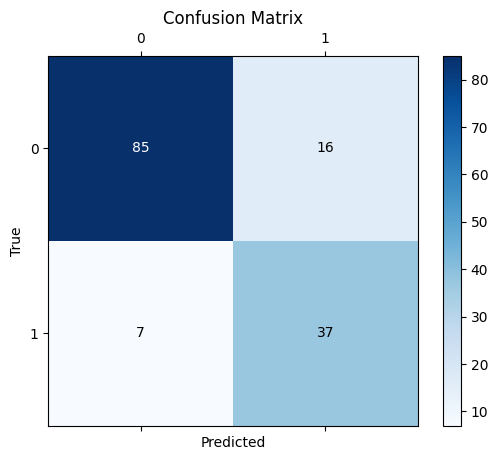

In [118]:
cm = confusion_matrix(y_val, predictions, labels=np.unique(y_val))
plot_confusion_matrix(cm, labels=np.unique(y_val))

### Calculate metrics

In [119]:
accuracy = accuracy_score(y_val, predictions)
recall = recall_score(cm)
precision = precision_score(cm)
f1 = f1_score(cm)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)

Accuracy:  0.8413793103448276
Recall:  0.8409090909090909
Precision:  0.6981132075471698
F1 Score:  0.7628865979381443


## Second dataset

### Load data

In [120]:
%cp /content/gdrive/MyDrive/ML/HW1/Imbalanced_Datasets/2.csv /content/
df2 = pd.read_csv("2.csv")
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Find the distribution


Find the number of samples from each target label.

In [121]:
target_distribution = df2['target'].value_counts()
print(target_distribution)

0    499
1    126
Name: target, dtype: int64


### Split data

In [122]:
X = df2.drop('target', axis=1).values
y = df2['target'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### Train model and make predictions

In [123]:
model = MixedDataNB()
model.fit(X_train, y_train)
predictions = model.predict(X_val)

### Plot confusion matrix

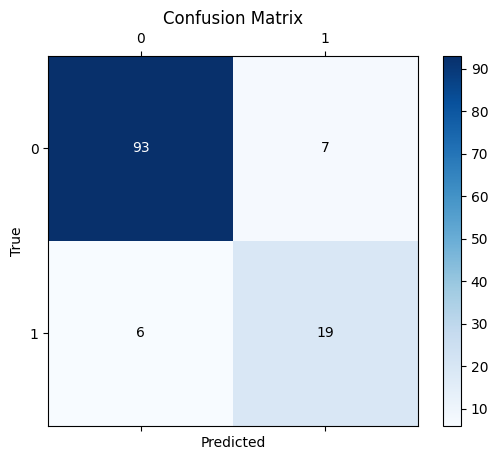

In [124]:
cm = confusion_matrix(y_val, predictions, labels=np.unique(y_val))
plot_confusion_matrix(cm, labels=np.unique(y_val))

### Calculate metrics

In [125]:
accuracy = accuracy_score(y_val, predictions)
recall = recall_score(cm)
precision = precision_score(cm)
f1 = f1_score(cm)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)

Accuracy:  0.896
Recall:  0.76
Precision:  0.7307692307692307
F1 Score:  0.7450980392156863


## Third dataset

### Load data

In [126]:
%cp /content/gdrive/MyDrive/ML/HW1/Imbalanced_Datasets/3.csv /content/
df3 = pd.read_csv("3.csv")
df3.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Find the distribution


Find the number of samples from each target label.

In [127]:
target_distribution = df3['target'].value_counts()
print(target_distribution)

0    499
1     26
Name: target, dtype: int64


### Split data

In [128]:
X = df3.drop('target', axis=1).values
y = df3['target'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### Train model and make predictions

In [129]:
model = MixedDataNB()
model.fit(X_train, y_train)
predictions = model.predict(X_val)

### Plot confusion matrix

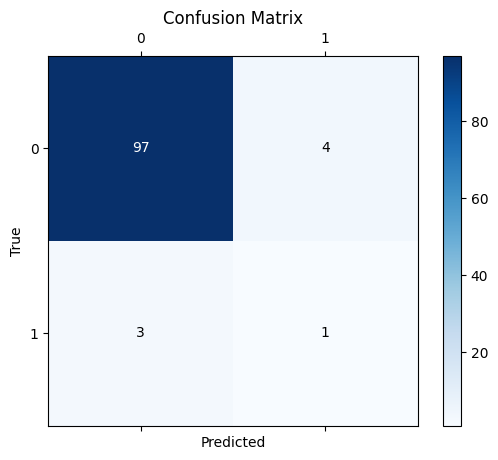

In [130]:
cm = confusion_matrix(y_val, predictions, labels=np.unique(y_val))
plot_confusion_matrix(cm, labels=np.unique(y_val))

### Calculate metrics

In [131]:
accuracy = accuracy_score(y_val, predictions)
recall = recall_score(cm)
precision = precision_score(cm)
f1 = f1_score(cm)

print("Accuracy: ", accuracy)
print("Recall: ", recall)
print("Precision: ", precision)
print("F1 Score: ", f1)

Accuracy:  0.9333333333333333
Recall:  0.25
Precision:  0.2
F1 Score:  0.22222222222222224


## Comparison

Based on the obtained results which accuracy and F1 score metrics are most appropriate for evaluating the model in imbalanced datasets?

[link text](https://)**Answer:**

From the results, we can see that as the dataset becomes more imbalanced,  the accuracy of the model increases and the F1 Score decreases. This is because of decline in Recall and Precision. This shows that when the imbalancy increases, the model favors the majority class.

Appropriate metric for evaluating the model in imbalanced datasets: Accuracy is not reliable when there is imbalancy. F1 score is much better for imbalanced datasets because it considers both Precision and Recall. A high F1 Score shows a balance between correctly finding positive cases (Recall) and the model not being overly triggered in predicting positives (Precision).

So the F1 Score is the most appropriate metric for evaluating models on imbalanced datasets, as it remains a more consistent by adding imbalancy.